# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [8]:
def CNT_CHILDREN_GRP(data):
    if data == 0 :
        return '0 個小孩'
    elif data >= 1 and data <=2 :
        return '有 1 - 2 個小孩'
    elif data >= 3 and data <=5 :
        return '有 3 - 5 個小孩'
    elif data > 5 : 
        return '有超過 5 個小孩'
    

In [9]:
#1
app_train['CNT_CHILDREN_GROUP'] = app_train['CNT_CHILDREN'].apply(CNT_CHILDREN_GRP)

app_train['CNT_CHILDREN_GROUP'].value_counts()

0 個小孩          215371
有 1 - 2 個小孩     87868
有 3 - 5 個小孩      4230
有超過 5 個小孩          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [38]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0 個小孩               0         166747.010980
                    1         160804.210548
有 1 - 2 個小孩         0         174590.584401
                    1         176115.362720
有 3 - 5 個小孩         0         175053.742913
                    1         160677.385714
有超過 5 個小孩           0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

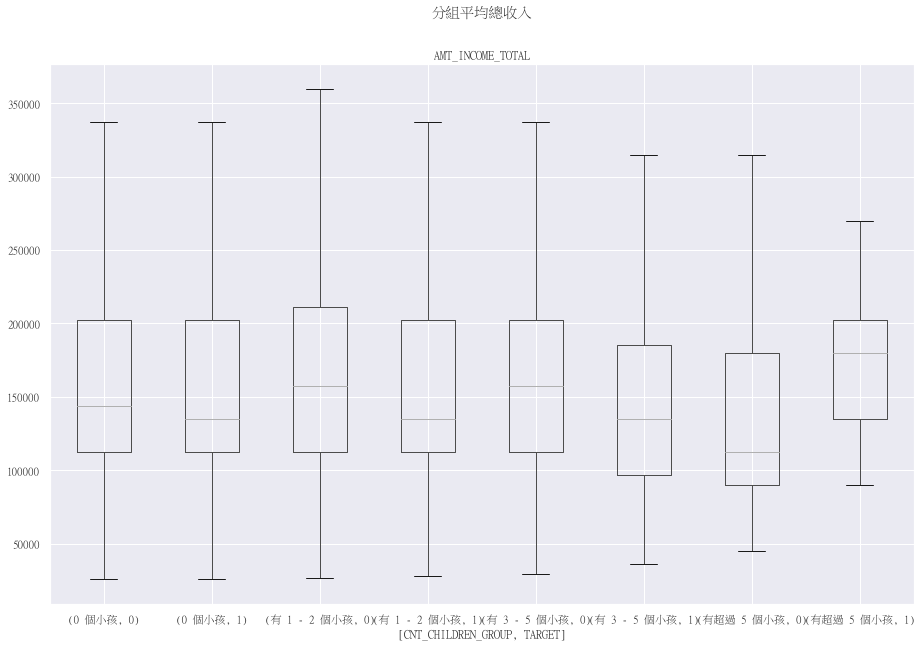

In [43]:
#2-2
#！！　重要：　Label顯示中文字體 (設定: 新細明體字型路徑)
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\mingliu.ttc',size=14)
sns.set(font=myfont.get_name())

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(15,10))
plt.suptitle('分組平均總收入')
plt.show()

In [70]:
#3

grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
display(grouped_df.describe())
print(grouped_df.head())

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - np.mean(x)) / np.std(x) )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head(20)

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
0 個小孩              0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
有 1 - 2 個小孩        0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
有 3 - 5 個小孩        0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
有超過 5 個小孩          0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
0 個小孩              0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
有 1 - 2 個小孩        0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
有 3 - 5 個小孩        0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
有超過 5 個小孩          0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
5          99000.0
6         171000.0
10        112500.0
13        225000.0
17         81000.0
19         90000.0
26        112500.0
40        202500.0
42        135000.0
81         81000.0
91        171000.0
92        135000.0
110       157500.0
144        58500.0
180       180000.0
182       225000.0
184       202500.0
246       121500.0
255       225000.0
261       112500.0
365        54000.0
2369      157500.0
2666       45000.0
3011      180000.0
3045      135000.0
3079       85500.0
7204      157500.0
12615     112500.0
17516     315000.0
23881     180000.0
25669     157500.0
34545     315000.0
72070      90000.0
76087     135000.0
140914    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64


,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.000,0.491536
1,270000.000,0.972437
2,67500.000,-0.934708
3,135000.000,-0.298993
4,121500.000,-0.426136
5,99000.000,-0.638041
6,171000.000,-0.029872
7,360000.000,1.820057
8,112500.000,-0.510898
9,135000.000,-0.298993
